<a href="https://colab.research.google.com/github/teddcp/MAchine-Learning-on-KAGGLE/blob/master/Classification_Diabetes_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** Kaggle [dataset](https://www.kaggle.com/kandij/diabetes-dataset)  

# Logistic Regression
---------------------------------------------

1. The **Pima Indians Diabetes Binary Classification dataset  [csv](https://www.kaggle.com/kandij/diabetes-dataset)** file contains all of the data of female   patients of the same age belonging to Pima Indian heritage. 

2. The data includes medical data, such as glucose and insulin levels, as well as lifestyle factors of the patients. The columns in the dataset are as follows: 

```	
    Number of times pregnant

    Plasma glucose concentration of 2 hours in an oral glucose tolerance test

    Diastolic blood pressure (mm Hg)

    Triceps skin fold thickness (mm)

    2-hour serum insulin (mu U/ml)

    Body mass index (weight in kg/(height in m)^2)

    Diabetes pedigree function
    
    Age (years)

    Class variable (0 or 1)

```


    
3. The last column is the target variable or class variable that takes the value 0 or 1, where 1 is positive or affected by diabetes and 0 means that the patient is not affected.

4. You have to build models that could predict whether a patient has diabetes or tests positive or not using **logistic regression**


In [0]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

In [0]:
data=pd.read_excel('/content/diabetes-data.xlsx')

In [133]:
data.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [134]:
data.columns

Index(['Number of times pregnant',
       'Plasma glucose concentration a 2 hours in an oral glucose tolerance test',
       'Diastolic blood pressure (mm Hg)', 'Triceps skin fold thickness (mm)',
       '2-Hour serum insulin (mu U/ml)',
       'Body mass index (weight in kg/(height in m)^2)',
       'Diabetes pedigree function', 'Age (years)', 'Class variable (0 or 1)'],
      dtype='object')

In [135]:
#renaming columns : shorter column names
data.rename(columns={'Number of times pregnant':'no_of_time_preg',
                     'Plasma glucose concentration a 2 hours in an oral glucose tolerance test':'plasma_glucose_test',
                     'Diastolic blood pressure (mm Hg)':'bp',
                     'Triceps skin fold thickness (mm)':'tricep_skin_thickness',
                     '2-Hour serum insulin (mu U/ml)':'serum_insulin',
                     'Body mass index (weight in kg/(height in m)^2)':'bmi',
                     'Diabetes pedigree function':'diabetes_function',
                     'Age (years)':'age',
                     'Class variable (0 or 1)':'class'
                     },inplace=True)
data.head()

,no_of_time_preg,plasma_glucose_test,bp,tricep_skin_thickness,serum_insulin,bmi,diabetes_function,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [136]:
data.info()  #no-null values are there and all are numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   no_of_time_preg        768 non-null    int64  
 1   plasma_glucose_test    768 non-null    int64  
 2   bp                     768 non-null    int64  
 3   tricep_skin_thickness  768 non-null    int64  
 4   serum_insulin          768 non-null    int64  
 5   bmi                    768 non-null    float64
 6   diabetes_function      768 non-null    float64
 7   age                    768 non-null    int64  
 8   class                  768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [137]:
data.describe()

,no_of_time_preg,plasma_glucose_test,bp,tricep_skin_thickness,serum_insulin,bmi,diabetes_function,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


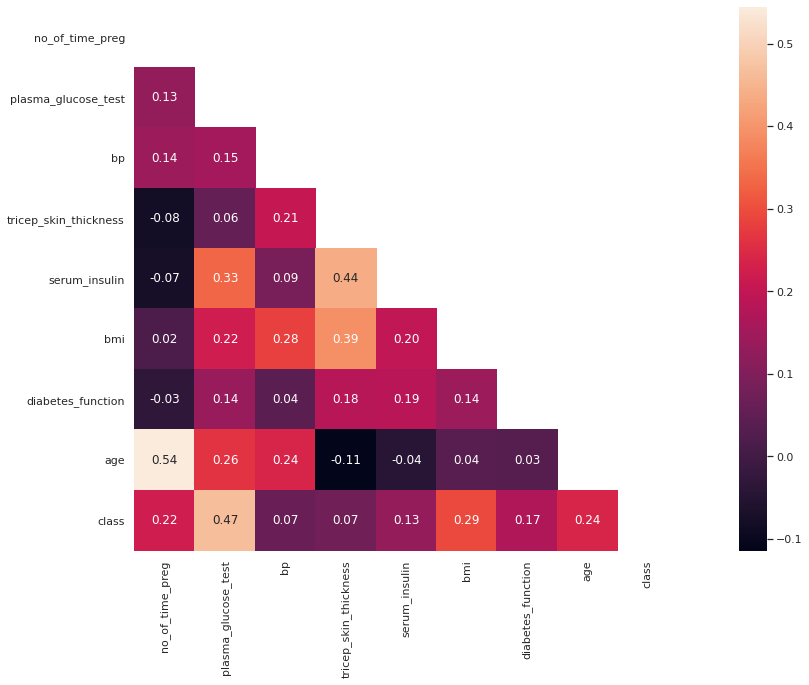

In [138]:
plt.figure(figsize=(22,10))
corr_mat=data.corr()
mask=np.triu(corr_mat)
sns.heatmap(corr_mat,mask=mask,annot=True,fmt='.2f',square=True)

## Visualization
------------------------------------

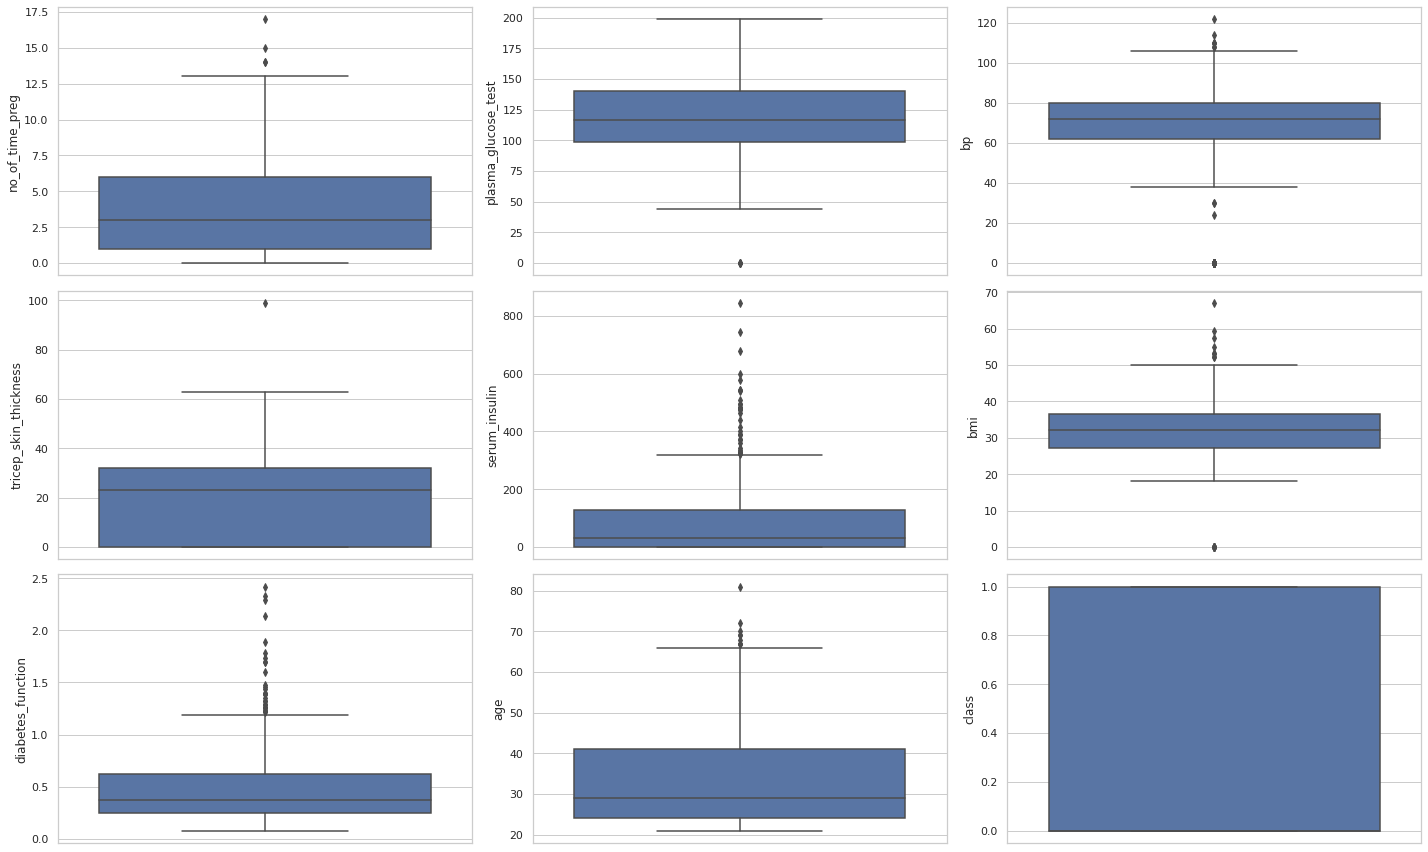

In [139]:
fig,arr= plt.subplots(3,3,figsize=(20,12))
k=1

for col in data.columns :
  plt.subplot(3,3,k)
  sns.boxplot(y=data[col])
  fig.tight_layout()
  k+=1

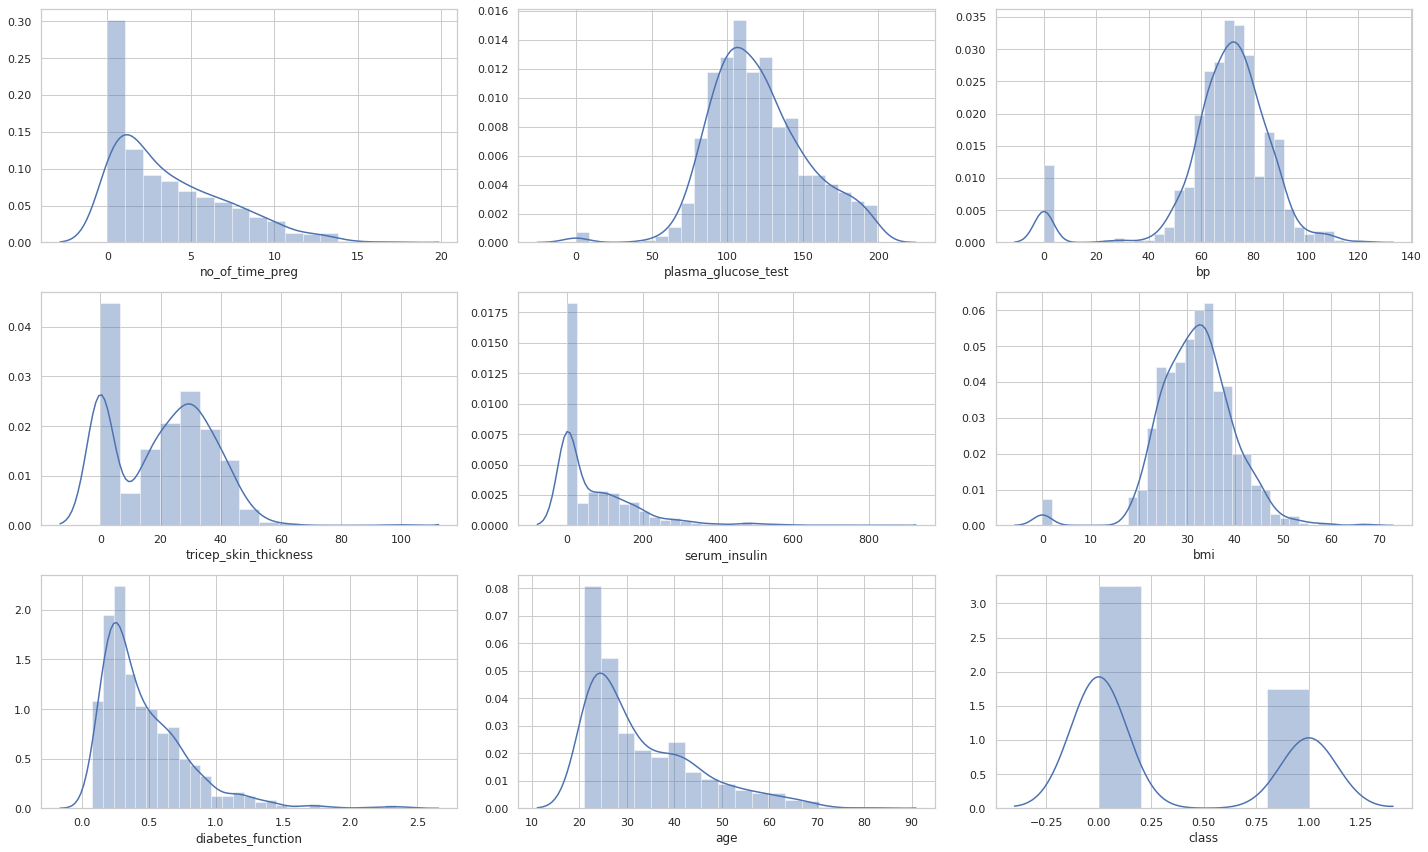

In [140]:
fig,arr= plt.subplots(3,3,figsize=(20,12))
k=1

for col in data.columns :
  plt.subplot(3,3,k)
  sns.distplot(data[col])
  fig.tight_layout()
  k+=1

<Figure size 1152x720 with 0 Axes>

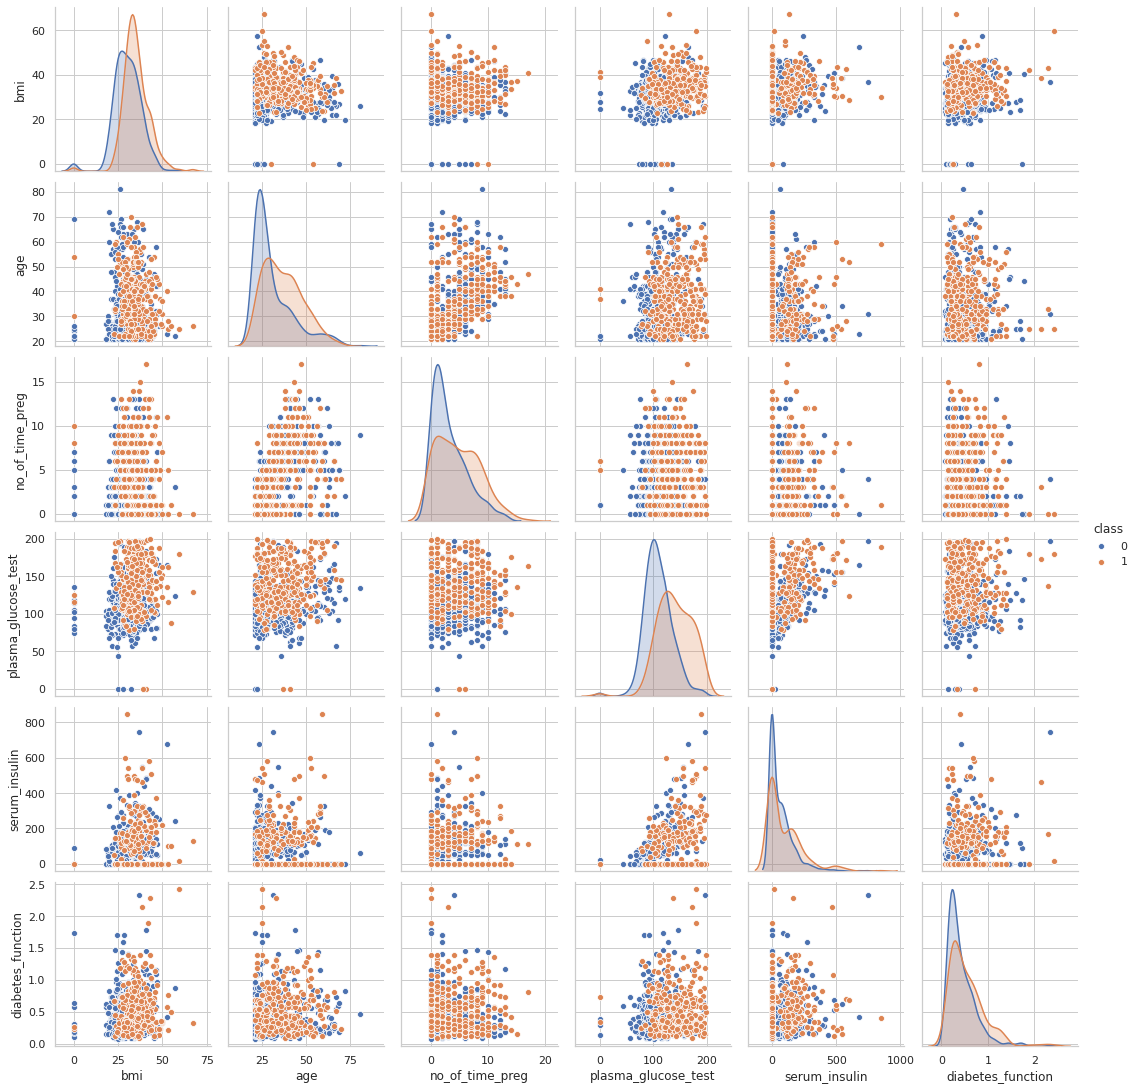

In [141]:
plt.figure(figsize=(16,10))
sns.pairplot(data,vars=['bmi','age','no_of_time_preg',	'plasma_glucose_test','serum_insulin','diabetes_function'	],hue='class')

**Note**
--------------------------------------------------------------------

1. From the graphs, we can see that the **bp,bmi and plasma_glucose_test** are having **0 vlaues** which are not possible and can be considered as outliers as they lie out of their distribution.

2. As bp is not corelated highly with class feature, we can drop that.

## Splitting the data for training and testing

In [0]:
x=data[['bmi','age','no_of_time_preg',	'plasma_glucose_test','serum_insulin','diabetes_function']]
y=data['class']

In [0]:
from sklearn.model_selection import train_test_split as tts

In [0]:
x_train,x_test,y_train,y_test= tts(x,y,test_size=0.3,random_state=101,stratify=y)

In [0]:
from sklearn.linear_model import LogisticRegression as lr
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline as mp
from sklearn.impute import SimpleImputer as imp
from sklearn.compose import ColumnTransformer as ct

## preparing the pipeline and fitting the model

In [0]:
transformer= ct(transformers=[('imputing', imp(missing_values=0,strategy='median'), ['bmi', 'plasma_glucose_test'])
                            ], remainder='passthrough')


model=mp(transformer, StandardScaler() , lr(random_state=42) )

In [224]:
model.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('imputing',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=None,
                                                                missing_values=0,
                                                                strategy='median',
                                                                verbose=0),
                                                  ['bmi',
                                                   'plasma_glucose_test'])],
                                   verbose=False)),
                ('

In [225]:
lrm=model.named_steps['logisticregression']
lrm.intercept_,lrm.coef_                       # getting the coefficients and intercepts

(array([-0.88295463]),
 array([[ 0.56370478,  1.20084239,  0.18102624,  0.38103345, -0.06504101,
          0.29725285]]))

In [0]:
#predicting
y_pred=model.predict(x_test)

In [0]:
#evaluation of the model : performance test
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report as cr

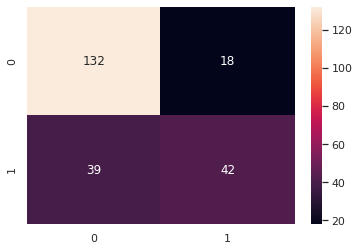

In [228]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.0f')

In [229]:
accuracy_score(y_test,y_pred)

0.7532467532467533

In [230]:
print(cr(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       150
           1       0.70      0.52      0.60        81

    accuracy                           0.75       231
   macro avg       0.74      0.70      0.71       231
weighted avg       0.75      0.75      0.74       231



#improving the model

In [0]:
param_grid = { 'C':np.logspace(-3,15,100),
               'solver' : ['lbfgs','sag','saga']
             }

In [0]:
from sklearn.model_selection import GridSearchCV as gsc

In [181]:
gsc_lr=gsc(lr(random_state=42,max_iter=10000,penalty='l2'),param_grid=param_grid,cv=10,scoring='accuracy')
gsc_lr.fit(x_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=10000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-03, 1....
       1.87381742e+12, 2.84803587e+12, 4.32876128e+12, 6.57933225e+12,
       1.00000000e+13, 1.51991108e+13, 2.31012970e+13, 3.51119173e+13,
       5.33669923e+13, 8.11130831e+13, 1.23284674e+14, 1.87381742e+14,
       2.84803587e+14, 4.32876128e+14, 6.57933225e+14, 1.00000000e+15]),
      

In [0]:
y_pred=gsc_lr.predict(x_test)

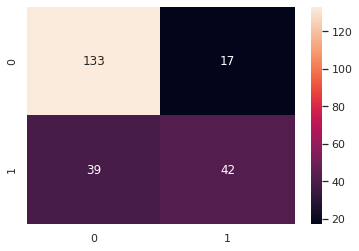

In [185]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.0f')

In [184]:
accuracy_score(y_test,y_pred)

0.7575757575757576

## Conclusion
--------------------------------------------

1. **Both with Logistic Regression and then with hyperparameter Tuning,** we are able to achieve**` 75% accuracy only`**.

2. We can improve the accuracy with SVM or Randomforest Classifier.